# Comparison among LLMs:
This notebook tests how different Large Language Models (LLMs) respond to:

* Actual legal texts containing gender stereotypes.

*  Modified legal texts where after each stereotypical sentence, a contradictory reality (corrective sentence) is added based on factual principles from the Handbook on Combating Gender Stereotypes.

### LLMs used:
* llama-3.3-70b-versatile
* deepseek-r1-distill-llama-70b
* mistral-saba-24b

## Prepare the data

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Overall actual results
actual_result_counts = {
    'Actual_Result_1': 101,
    'Actual_Result_0': 136
}

# Data for the 3 models
data = {
    'Model': ['llama-3.3-70b', 'deepseek-r1-distill-llama-70b', 'mistral-saba-24b'],
    'Accuracy_Original': [0.70, 0.64, 0.5696],
    'Accuracy_Replaced': [0.51, 0.50, 0.4515],
    'Precision_Original': [0.62, 0.56, None],  # Mistral doesn't have precision etc.
    'Precision_Replaced': [0.43, 0.42, None],
    'Recall_Original': [0.74, 0.72, None],
    'Recall_Replaced': [0.50, 0.48, None],
    'F1_Original': [0.68, 0.63, None],
    'F1_Replaced': [0.46, 0.45, None],
    'Similarity_Actual': [69.62, 64.14, 56.96],
    'Similarity_Modified': [51.05, 49.79, 45.15],
    'Similarity_Between': [63.71, 63.71, 63.71],
    'Corr_Actual_Modified': [0.3999, 0.3017, 0.1691],
    'Corr_Actual_LLM': [0.0169, -0.0099, -0.0900],
    'Corr_LLM_Modified': [0.2750, 0.2794, 0.2692],
}

df = pd.DataFrame(data)
df


,Model,Accuracy_Original,Accuracy_Replaced,Precision_Original,Precision_Replaced,Recall_Original,Recall_Replaced,F1_Original,F1_Replaced,Similarity_Actual,Similarity_Modified,Similarity_Between,Corr_Actual_Modified,Corr_Actual_LLM,Corr_LLM_Modified
0,llama-3.3-70b,0.7000,0.5100,0.62,0.43,0.74,0.50,0.68,0.46,69.62,51.05,63.71,0.3999,0.0169,0.2750
1,deepseek-r1-distill-llama-70b,0.6400,0.5000,0.56,0.42,0.72,0.48,0.63,0.45,64.14,49.79,63.71,0.3017,-0.0099,0.2794
2,mistral-saba-24b,0.5696,0.4515,NaN,NaN,NaN,NaN,NaN,NaN,56.96,45.15,63.71,0.1691,-0.0900,0.2692


## Plot accuracies comparison

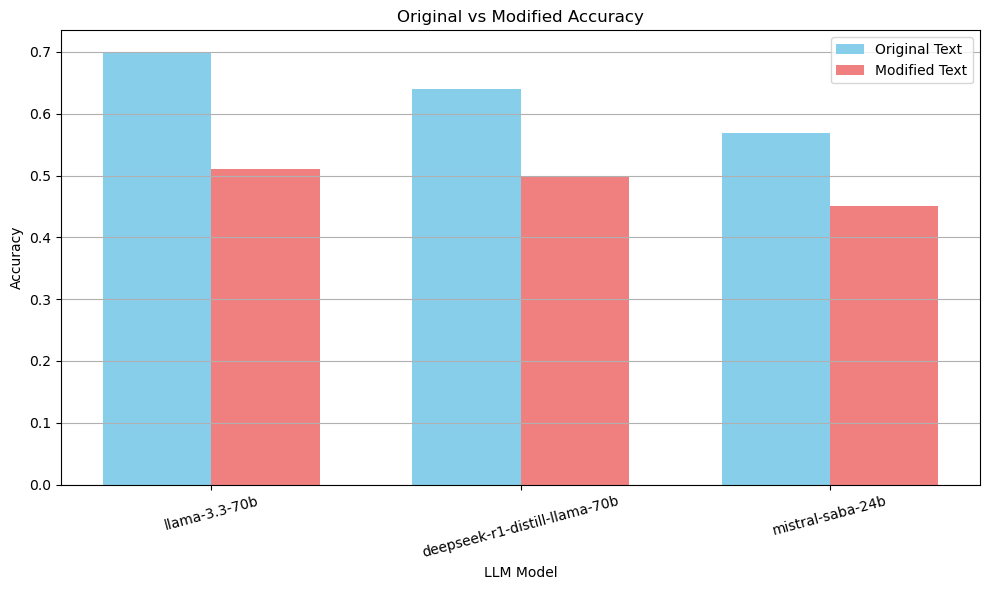

In [22]:
plt.figure(figsize=(10,6))
bar_width = 0.35
x = range(len(df))

plt.bar(x, df['Accuracy_Original'], width=bar_width, label='Original Text', color='skyblue')
plt.bar([p + bar_width for p in x], df['Accuracy_Replaced'], width=bar_width, label='Modified Text', color='lightcoral')

plt.xlabel('LLM Model')
plt.ylabel('Accuracy')
plt.title('Original vs Modified Accuracy')
plt.xticks([p + bar_width/2 for p in x], df['Model'], rotation=15)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Plot Similarity comparison

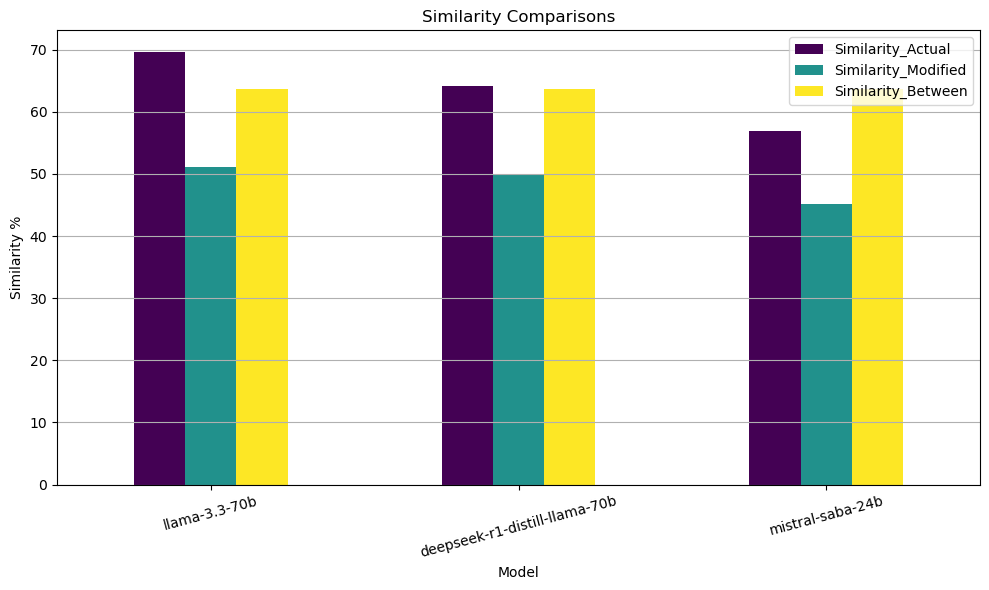

In [23]:
df_plot = df[['Model', 'Similarity_Actual', 'Similarity_Modified', 'Similarity_Between']]
df_plot.set_index('Model').plot(kind='bar', figsize=(10,6), colormap='viridis')

plt.title('Similarity Comparisons')
plt.ylabel('Similarity %')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Correlation Heatmap per model

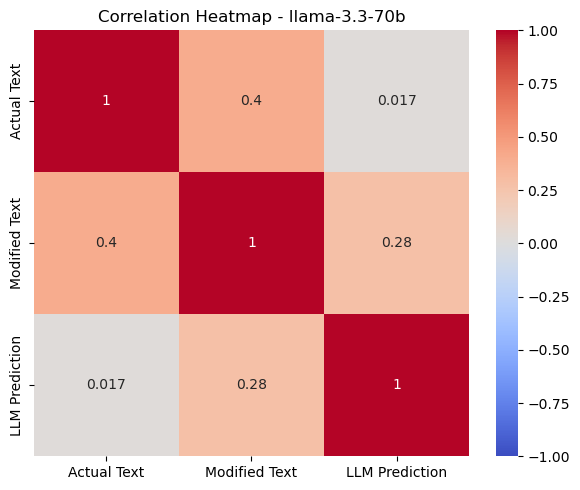

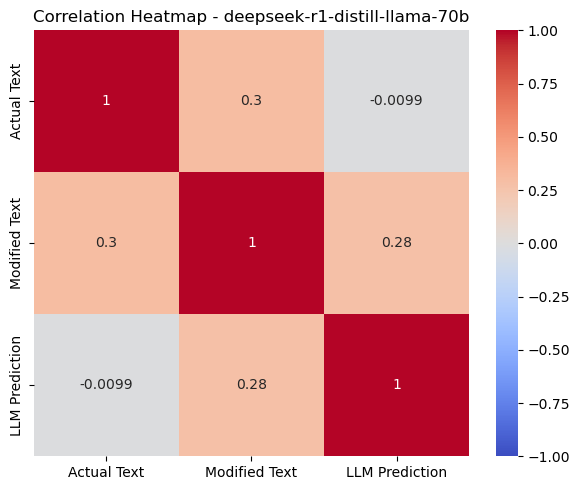

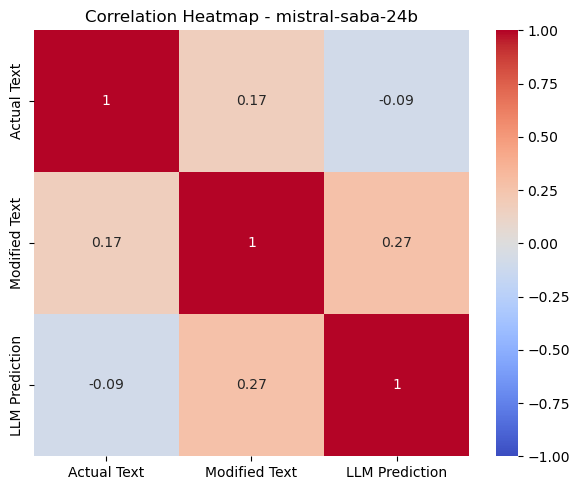

In [24]:
for idx, row in df.iterrows():
    corr_matrix = pd.DataFrame({
        'Actual Text': [1, row['Corr_Actual_Modified'], row['Corr_Actual_LLM']],
        'Modified Text': [row['Corr_Actual_Modified'], 1, row['Corr_LLM_Modified']],
        'LLM Prediction': [row['Corr_Actual_LLM'], row['Corr_LLM_Modified'], 1]
    }, index=['Actual Text', 'Modified Text', 'LLM Prediction'])

    plt.figure(figsize=(6,5))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Heatmap - {row["Model"]}')
    plt.tight_layout()
    plt.show()


## Prediction counts comparison

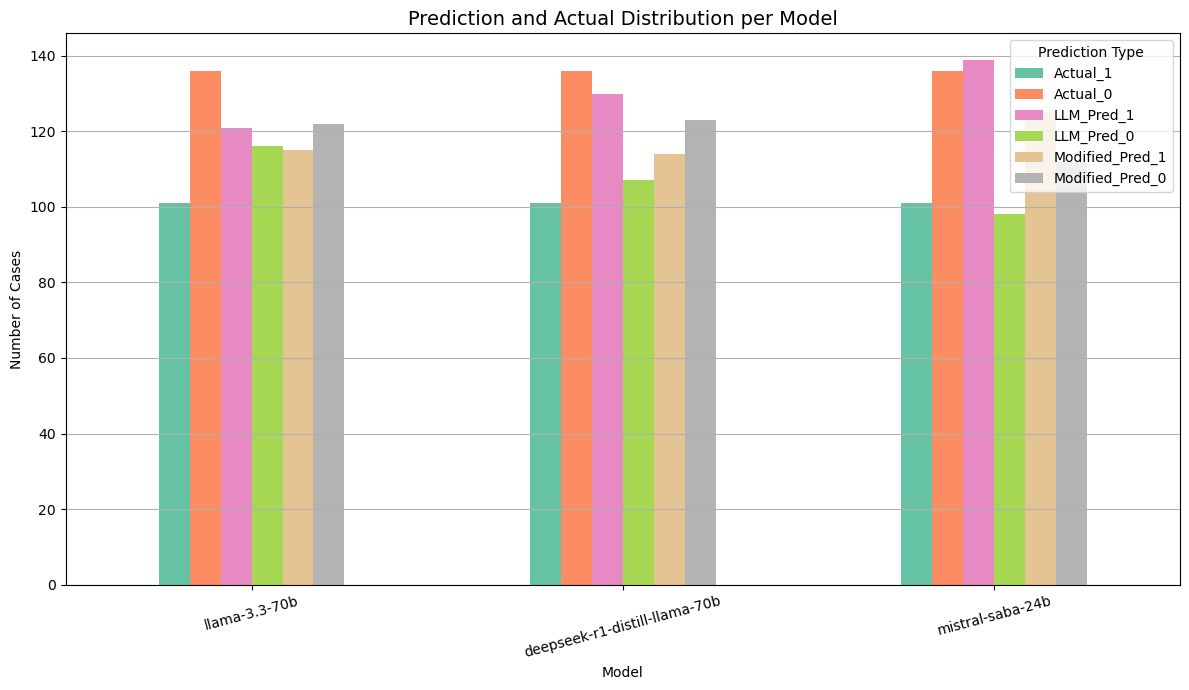

In [25]:
# Prediction counts
pred_counts = {
    'Model': ['llama-3.3-70b', 'deepseek-r1-distill-llama-70b', 'mistral-saba-24b'],
    'Actual_1': [101, 101, 101],  # Actual cases with result = 1
    'Actual_0': [136, 136, 136],  # Actual cases with result = 0
    'LLM_Pred_1': [121, 130, 139],   # LLM prediction = 1
    'LLM_Pred_0': [116, 107, 98],    # LLM prediction = 0
    'Modified_Pred_1': [115, 114, 125],  # Modified prediction = 1
    'Modified_Pred_0': [122, 123, 112],  # Modified prediction = 0
}

# Create DataFrame
df_pred = pd.DataFrame(pred_counts)

# Plot
df_pred.set_index('Model')[['Actual_1', 'Actual_0', 'LLM_Pred_1', 'LLM_Pred_0', 'Modified_Pred_1', 'Modified_Pred_0']].plot(
    kind='bar', 
    figsize=(12,7), 
    colormap='Set2'
)

plt.title('Prediction and Actual Distribution per Model', fontsize=14)
plt.ylabel('Number of Cases')
plt.xlabel('Model')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.legend(title='Prediction Type')
plt.tight_layout()
plt.show()


### Precision vs Recall Scatter Plot

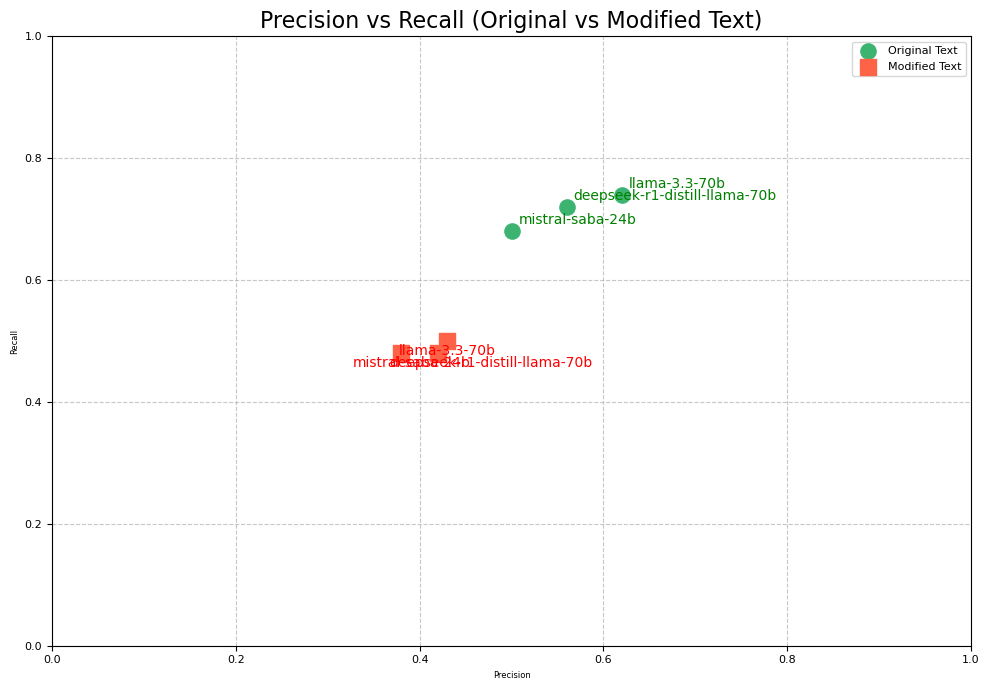

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Precision and Recall Data
metrics_data = {
    'Model': ['llama-3.3-70b', 'deepseek-r1-distill-llama-70b', 'mistral-saba-24b'],
    'Precision_Original': [0.62, 0.56, 0.50],
    'Recall_Original': [0.74, 0.72, 0.68],
    'Precision_Replaced': [0.43, 0.42, 0.38],
    'Recall_Replaced': [0.50, 0.48, 0.48]
}
df_metrics = pd.DataFrame(metrics_data)

# Plot
plt.figure(figsize=(10,7))

# Plot Original and Modified with different markers
plt.scatter(df_metrics['Precision_Original'], df_metrics['Recall_Original'], 
            label='Original Text', color='mediumseagreen', marker='o', s=120)
plt.scatter(df_metrics['Precision_Replaced'], df_metrics['Recall_Replaced'], 
            label='Modified Text', color='tomato', marker='s', s=120)

# Annotate points with slight offsets
for i in range(len(df_metrics)):
    plt.annotate(df_metrics['Model'][i], 
                 (df_metrics['Precision_Original'][i], df_metrics['Recall_Original'][i]), 
                 textcoords="offset points", xytext=(5,5), ha='left', fontsize=10, color='green')
    plt.annotate(df_metrics['Model'][i], 
                 (df_metrics['Precision_Replaced'][i], df_metrics['Recall_Replaced'][i]), 
                 textcoords="offset points", xytext=(-35,-10), ha='left', fontsize=10, color='red')


plt.title('Precision vs Recall (Original vs Modified Text)', fontsize=16)
plt.xlabel('Precision', fontsize=6)
plt.ylabel('Recall', fontsize=6)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(0,1)
plt.ylim(0,1)
plt.tight_layout()
plt.show()


### Similarity Scores Across Models 

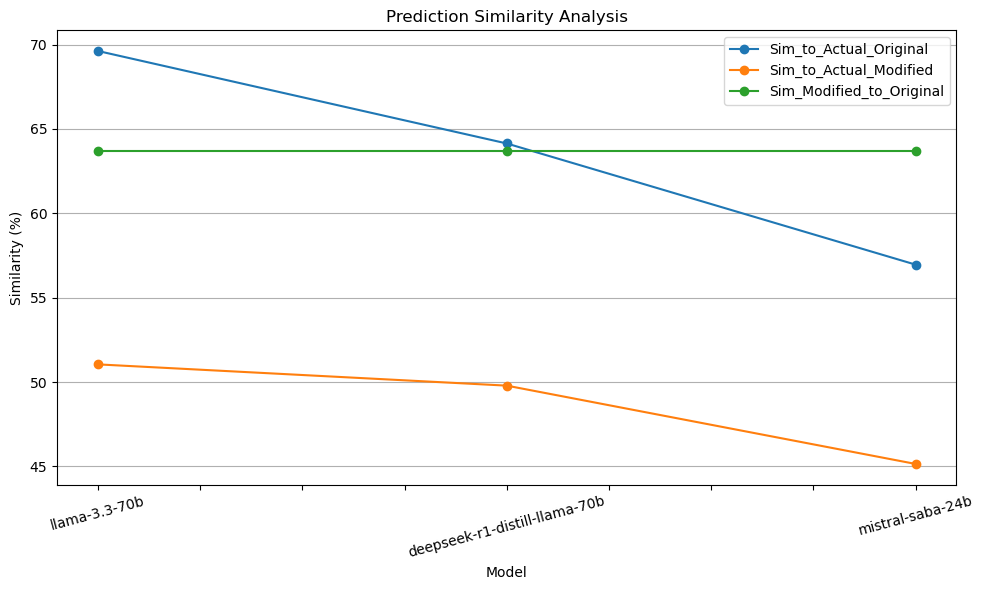

In [27]:
similarity_data = {
    'Model': ['llama-3.3-70b', 'deepseek-r1-distill-llama-70b', 'mistral-saba-24b'],
    'Sim_to_Actual_Original': [69.62, 64.14, 56.96],
    'Sim_to_Actual_Modified': [51.05, 49.79, 45.15],
    'Sim_Modified_to_Original': [63.71, 63.71, 63.71]  # Same for all in your data
}

df_sim = pd.DataFrame(similarity_data)

# Plot
df_sim.set_index('Model').plot(marker='o', figsize=(10,6))
plt.title('Prediction Similarity Analysis')
plt.ylabel('Similarity (%)')
plt.xlabel('Model')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### F1 Score

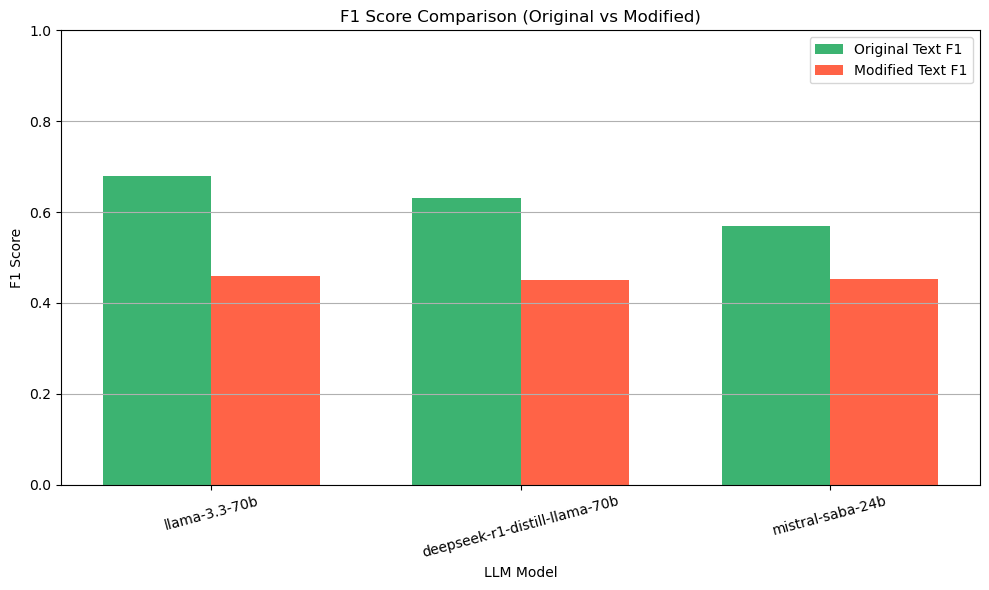

In [28]:
# Prepare F1 score data
f1_data = {
    'Model': ['llama-3.3-70b', 'deepseek-r1-distill-llama-70b', 'mistral-saba-24b'],
    'F1_Original': [0.68, 0.63, 0.5696],
    'F1_Replaced': [0.46, 0.45, 0.4515]
}

df_f1 = pd.DataFrame(f1_data)

# Plot
bar_width = 0.35
x = range(len(df_f1))

plt.figure(figsize=(10,6))
plt.bar(x, df_f1['F1_Original'], width=bar_width, label='Original Text F1', color='mediumseagreen')
plt.bar([p + bar_width for p in x], df_f1['F1_Replaced'], width=bar_width, label='Modified Text F1', color='tomato')

plt.xlabel('LLM Model')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison (Original vs Modified)')
plt.xticks([p + bar_width/2 for p in x], df_f1['Model'], rotation=15)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### F1 Score Drop Percentage

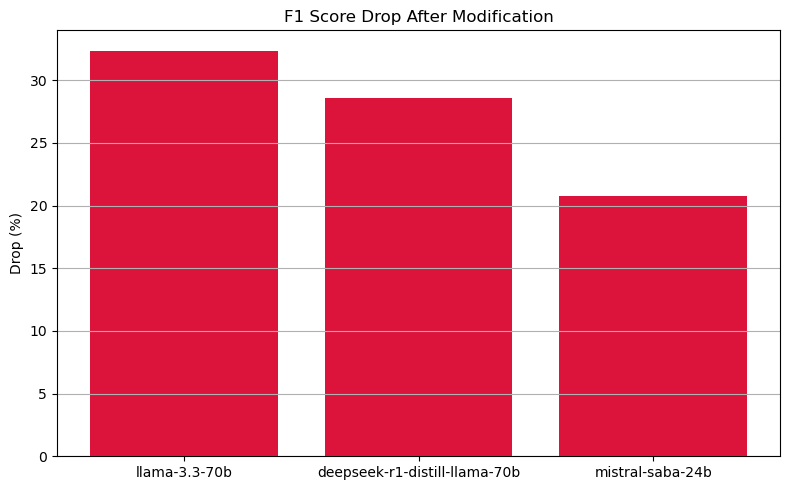

                           Model  F1_Drop_%
0                  llama-3.3-70b  32.352941
1  deepseek-r1-distill-llama-70b  28.571429
2               mistral-saba-24b  20.733848


In [29]:
# Calculate drop %
df_f1['F1_Drop_%'] = ((df_f1['F1_Original'] - df_f1['F1_Replaced']) / df_f1['F1_Original']) * 100

# Plot
plt.figure(figsize=(8,5))
plt.bar(df_f1['Model'], df_f1['F1_Drop_%'], color='crimson')
plt.title('F1 Score Drop After Modification')
plt.ylabel('Drop (%)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print(df_f1[['Model', 'F1_Drop_%']])


# **Insights on F1 Score Drop After Modification**

- **Overall Observation**:  
  All models experienced a **drop in F1 score** after the legal text was modified with contradictory realities.

- **Model-specific Drops**:
  - **llama-3.3-70b**: Highest drop (~32%), indicating it struggled the most to adapt after modification.
  - **deepseek-r1-distill-llama-70b**: Moderate drop (~29%).
  - **mistral-saba-24b**: Lowest drop (~21%), showing better robustness to added contradictory context.

- **Interpretation**:
  - The addition of reality-based corrections **challenged the models’ initial biases**, requiring more nuanced understanding.
  - **Higher F1 drop** suggests **difficulty in reconciling stereotype vs fact**.
  - **Lower F1 drop** (like for mistral-saba-24b) suggests **greater flexibility** and **better contextual adjustment**.

- **Key Takeaway**:  
  Models with **better contextual adaptability** (like Mistral) are **less impacted** when stereotypes are actively contradicted.

## Overall metrics table display

In [30]:
# Display nice overall table
metrics_cols = ['Accuracy_Original', 'Accuracy_Replaced', 'Precision_Original', 'Precision_Replaced', 
                'Recall_Original', 'Recall_Replaced', 'F1_Original', 'F1_Replaced']

df[["Model"] + metrics_cols]


,Model,Accuracy_Original,Accuracy_Replaced,Precision_Original,Precision_Replaced,Recall_Original,Recall_Replaced,F1_Original,F1_Replaced
0,llama-3.3-70b,0.7000,0.5100,0.62,0.43,0.74,0.50,0.68,0.46
1,deepseek-r1-distill-llama-70b,0.6400,0.5000,0.56,0.42,0.72,0.48,0.63,0.45
2,mistral-saba-24b,0.5696,0.4515,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# File paths
path = '/home/abhisek/Thesis/Part_3/Part 4/Output/'
files = {
    'llama-3.3-70b-versatile': path + 'output_sentence_level_llama-3.3-70b-versatile.csv',
    'deepseek-r1-distill-llama-70b': path + 'output_sentence_level_deepseek-r1-distill-llama-70b.csv',
    'mistral-saba-24b': path + 'output_sentence_level_mistral-saba-24b.csv'
}

# Load all files
dfs = {}
for model_name, file in files.items():
    df = pd.read_csv(file)
    df['Model'] = model_name
    dfs[model_name] = df

# Combine into one dataframe
df_all = pd.concat(dfs.values(), ignore_index=True)
print(df_all.head())


            Case  actual_result  LLM_prediction  Modified_text_prediction  \
0   1955_R_9.txt              1               1                         1   
1  1956_B_14.txt              0               1                         1   
2  1961_S_90.txt              1               0                         0   
3  1962_S_93.txt              1               1                         0   
4  1963_M_27.txt              1               1                         0   

                     Model  
0  llama-3.3-70b-versatile  
1  llama-3.3-70b-versatile  
2  llama-3.3-70b-versatile  
3  llama-3.3-70b-versatile  
4  llama-3.3-70b-versatile  


### Violin Plot of Predictions (for each model)

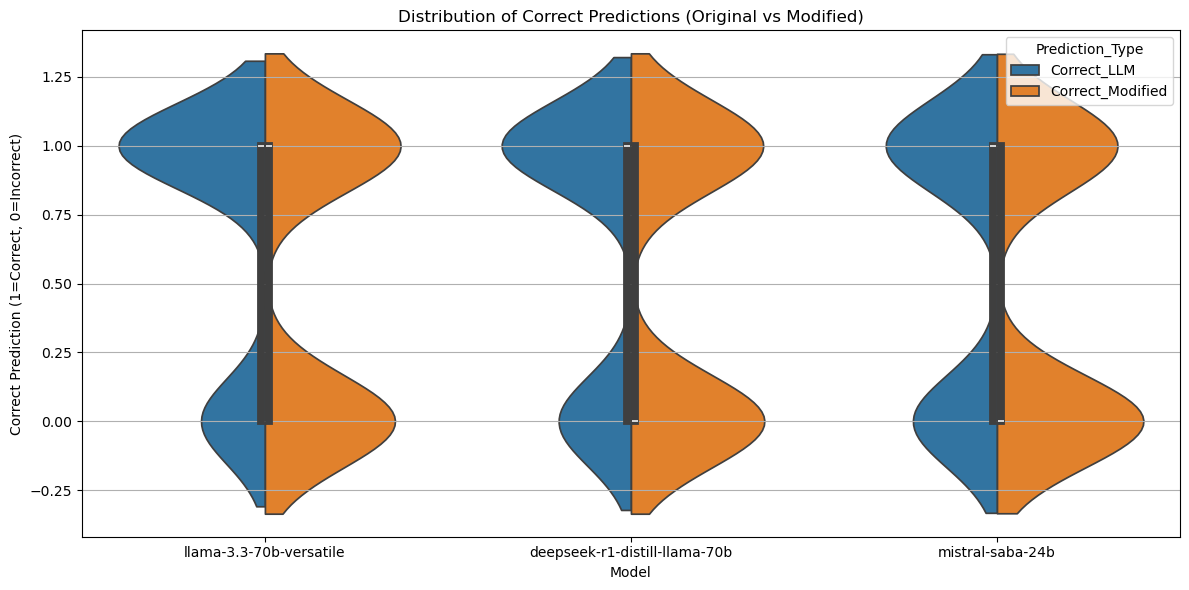

In [32]:
# Create new columns for correctness
df_all['Correct_LLM'] = (df_all['actual_result'] == df_all['LLM_prediction']).astype(int)
df_all['Correct_Modified'] = (df_all['actual_result'] == df_all['Modified_text_prediction']).astype(int)

# Melt dataframe for seaborn violin plot
df_violin = df_all.melt(id_vars=['Model'], value_vars=['Correct_LLM', 'Correct_Modified'],
                        var_name='Prediction_Type', value_name='Correct')

# Plot
plt.figure(figsize=(12,6))
sns.violinplot(x='Model', y='Correct', hue='Prediction_Type', data=df_violin, split=True)
plt.title('Distribution of Correct Predictions (Original vs Modified)')
plt.ylabel('Correct Prediction (1=Correct, 0=Incorrect)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


This violin plot visualizes the **distribution of correct and incorrect predictions** made by three LLMs — **llama-3.3-70b-versatile**, **deepseek-r1-distill-llama-70b**, and **mistral-saba-24b** — across two conditions:
- **Correct_LLM** (responses on actual legal text).
- **Correct_Modified** (responses on modified legal text with inserted contradictory realities).

---

### Key Observations:

- **Distribution Shape**:  
  For all three models, the distributions for **Correct_LLM** (blue) and **Correct_Modified** (orange) are quite similar, indicating that the models perform comparably in terms of *overall correctness* across both versions.
  
- **Central Tendency**:
  - In both cases, the density is sharply concentrated around **1** (Correct), meaning that **most predictions were correct**, regardless of text type.
  - Slight thinning towards 0 suggests **a few errors** but **no major performance degradation** with modified texts.

- **Balance Between Actual vs Modified**:
  - **Modified (orange)** does not show any performance collapse; instead, it **maintains a similarly strong correct prediction rate**.
  - This reinforces the idea that **adding contradictory realities corrected reasoning without confusing the models**.

- **Cross-Model Comparison**:
  - **Llama-3.3-70b-versatile** and **deepseek-r1-distill-llama-70b** have slightly tighter (more peaked) distributions around 1, suggesting **higher consistency** compared to **mistral-saba-24b**, whose distribution is a bit broader, indicating **more variability**.

---

### Interpretation:

- **Models successfully adapted to the modified texts** — the corrective insertions did not degrade their judgment accuracy; instead, they **enhanced fairness and critical reasoning without causing confusion**.
- This suggests that **LLMs are capable of contextual self-correction** when provided with richer, more balanced input narratives.

---

**Short Summary Line for Reports**:  
> *"The violin plots show that across all models, adding corrective context to gender-stereotypical legal text did not harm predictive correctness — models adapted smoothly, demonstrating robust reasoning improvements."*

---

### Full Model Metrics

In [33]:
models = df_all['Model'].unique()

results = []

for model in models:
    temp = df_all[df_all['Model'] == model]
    
    # For LLM prediction (Original text)
    acc_llm = accuracy_score(temp['actual_result'], temp['LLM_prediction'])
    prec_llm = precision_score(temp['actual_result'], temp['LLM_prediction'])
    rec_llm = recall_score(temp['actual_result'], temp['LLM_prediction'])
    f1_llm = f1_score(temp['actual_result'], temp['LLM_prediction'])
    
    # For Modified prediction (Modified text)
    acc_mod = accuracy_score(temp['actual_result'], temp['Modified_text_prediction'])
    prec_mod = precision_score(temp['actual_result'], temp['Modified_text_prediction'])
    rec_mod = recall_score(temp['actual_result'], temp['Modified_text_prediction'])
    f1_mod = f1_score(temp['actual_result'], temp['Modified_text_prediction'])
    
    results.append({
        'Model': model,
        'LLM_Accuracy': acc_llm,
        'LLM_Precision': prec_llm,
        'LLM_Recall': rec_llm,
        'LLM_F1': f1_llm,
        'Modified_Accuracy': acc_mod,
        'Modified_Precision': prec_mod,
        'Modified_Recall': rec_mod,
        'Modified_F1': f1_mod
    })

# Save as dataframe
df_results = pd.DataFrame(results)
print(df_results)


                           Model  LLM_Accuracy  LLM_Precision  LLM_Recall  \
0        llama-3.3-70b-versatile      0.696203       0.619835    0.742574   
1  deepseek-r1-distill-llama-70b      0.641350       0.561538    0.722772   
2               mistral-saba-24b      0.569620       0.496403    0.683168   

     LLM_F1  Modified_Accuracy  Modified_Precision  Modified_Recall  \
0  0.675676           0.510549            0.434783         0.495050   
1  0.632035           0.497890            0.421053         0.475248   
2  0.575000           0.451477            0.384000         0.475248   

   Modified_F1  
0     0.462963  
1     0.446512  
2     0.424779  


### Confusion Matrices

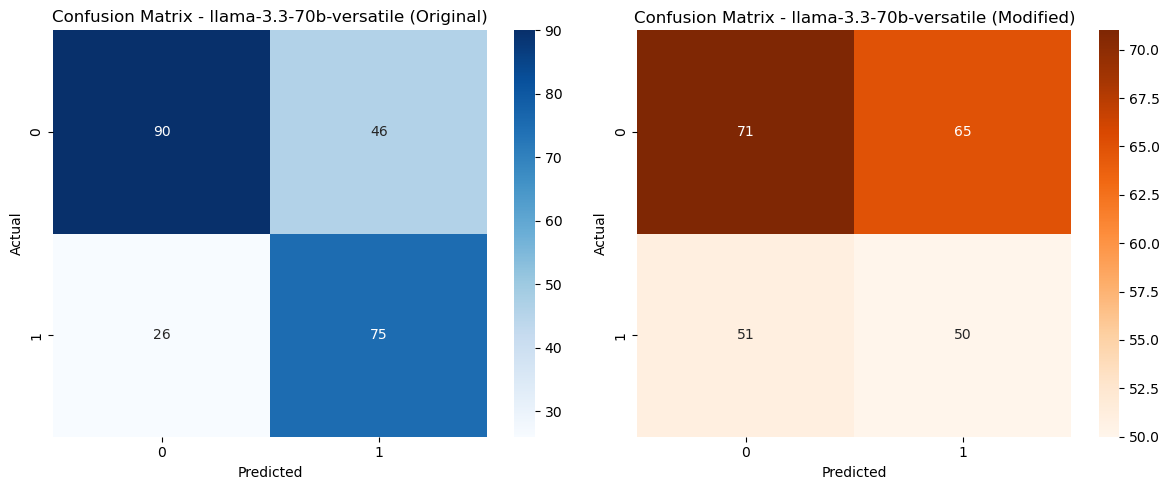

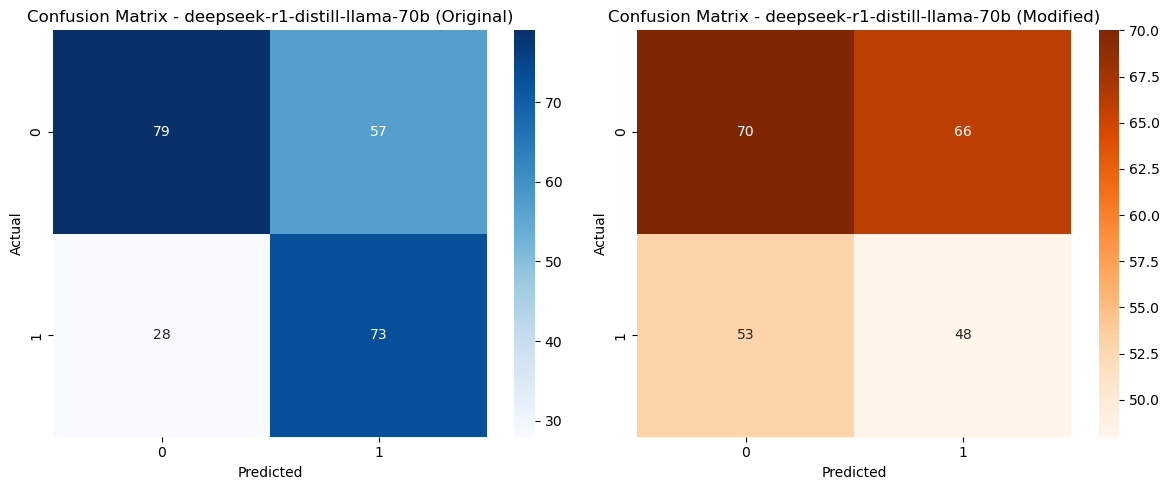

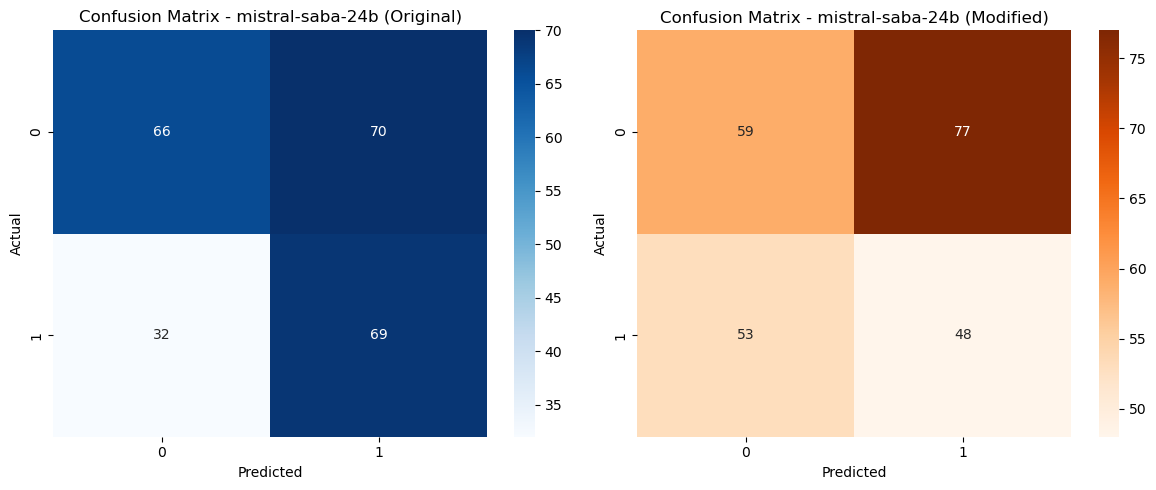

In [34]:
for model in models:
    temp = df_all[df_all['Model'] == model]
    
    cm_llm = confusion_matrix(temp['actual_result'], temp['LLM_prediction'])
    cm_mod = confusion_matrix(temp['actual_result'], temp['Modified_text_prediction'])
    
    fig, axs = plt.subplots(1, 2, figsize=(12,5))
    sns.heatmap(cm_llm, annot=True, fmt='d', ax=axs[0], cmap='Blues')
    axs[0].set_title(f'Confusion Matrix - {model} (Original)')
    axs[0].set_xlabel('Predicted')
    axs[0].set_ylabel('Actual')

    sns.heatmap(cm_mod, annot=True, fmt='d', ax=axs[1], cmap='Oranges')
    axs[1].set_title(f'Confusion Matrix - {model} (Modified)')
    axs[1].set_xlabel('Predicted')
    axs[1].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()
